## Q learning implementation on Gym frozenlake environment


Q learning is an off policy method, where MC and dynamic programming is combined

Q table is a value table for each possible state-action pair

As the environment is explored our Q table gets updated:

we are in S state and take A action, we get into S' state.
A action is chosen derived from Q(S,A), using epsilon-greedy policy
Our Q value for Q(S,A) = Q(S,A) + alpha * (reward(S,A) + gamma * Q(S',A'| where Q is highest) - Q(S,A) )

alpha : learning rate
gamma : discount factor

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Qtable:
    def __init__(self, stateNumber, actionNumber,discountFactor = 0.95, learningRate = .5, epsilon = .2):
        self.stateNumber = stateNumber
        self.actionNumber = actionNumber
        self.Qtable = np.zeros((stateNumber,actionNumber))
        self.Qcount = np.ones((stateNumber,actionNumber))
        self.gamma = discountFactor
        self.alpha = learningRate
        self.epsilon = epsilon #Factor for choosing between exploration and exploitation
        
    def get_policy(self, state):
        probability = (self.epsilon / (self.actionNumber-1))
        pArray = np.ones(self.actionNumber) * probability
        if np.argmax(self.Qtable[state]) != np.argmin(self.Qtable[state]):
            pArray[np.argmax(self.Qtable[state])] = 1-probability*(self.actionNumber-1)
            action = np.random.choice(np.arange(self.actionNumber),p=pArray)
        else:
            action = np.random.choice(self.actionNumber)
        
        
        return action
    
    def update_Q(self,state,nextState, action, reward):
        
        self.Qtable[state,action] += self.alpha * ( reward + self.gamma * np.max(self.Qtable[nextState]) - self.Qtable[state,action])
        self.Qcount[state,action] += 1
        
def step(env,Qtable,state):
    action = Qtable.get_policy(state)
    (newState,reward,done,info) = env.step(action)
    Qtable.update_Q(state,newState,action,reward)
    
    return (newState, action,  reward, done)

def episode(env, Qtable):
    done = False
    state = env.reset()
    trajectory = []
    while not done:
        
        (state, action, reward, done) = step(env, Qtable,state)
        trajectory.append([state,action, reward])
    return ( reward, trajectory)

def epicycle(env,Qtable,N):
    rewards = np.ones(N)
    for i in range(N):
        (rewards[i], trajectory) = episode(env,Qtable)
        if rewards[i] == 1: 
            #Decrease learning epsilon on each successful iteration
            Qtable.epsilon *= 0.995
            
    return rewards
        


        

In [3]:
environment = gym.make("FrozenLake8x8-v0")
environment.reset()
environment.render()
Q = Qtable(environment.env.nS,environment.env.nA )


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [4]:
rewards = epicycle(environment, Q , 15000)

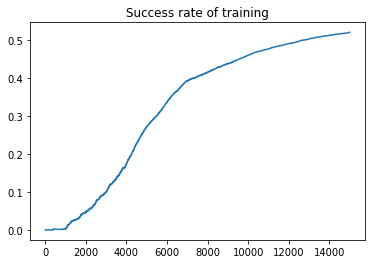

In [16]:
plt.plot(np.divide(np.cumsum(rewards),np.arange(len(rewards))+1))
plt.title("Success rate of training")
plt.show()

In [6]:
def render(valuesMap, title):
    plt.imshow(np.log(np.concatenate(
    ((np.concatenate(
        (
            (np.reshape([element[0] for element in valuesMap],(8,8))),
            (np.reshape([element[1] for element in valuesMap],(8,8)))
        ),
        axis=0
    )),
    (np.concatenate(
        (
            (np.reshape([element[3] for element in valuesMap],(8,8))),
            (np.reshape([element[2] for element in valuesMap],(8,8)))
        ),
        axis=0
    ))),
    axis=1
    )))
    plt.colorbar()
    print(" (value of action) \n \n Direction of action: \n \n | Left | Up    | \n |------|-------| \n | Down | Right |")
    plt.title(title, fontsize = "x-large")
    plt.grid(b=True,color="black", which='both', axis='both',linewidth=2)
    plt.text(1,1, "Left",fontsize = "x-large")
    plt.text(9,9, "Right",fontsize = "x-large")
    plt.text(1,9, "Down",fontsize = "x-large")
    plt.text(9,1, "Up",fontsize = "x-large")
    plt.xticks(np.arange(-.5,8*2,8),[])
    plt.yticks(np.arange(-.5,9*2,8),[])

    plt.show()

 (value of action) 
 
 Direction of action: 
 
 | Left | Up    | 
 |------|-------| 
 | Down | Right |


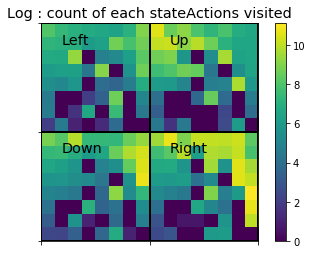

In [7]:
render(Q.Qcount, "Log : count of each stateActions visited")

/home/oomti/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


 (value of action) 
 
 Direction of action: 
 
 | Left | Up    | 
 |------|-------| 
 | Down | Right |


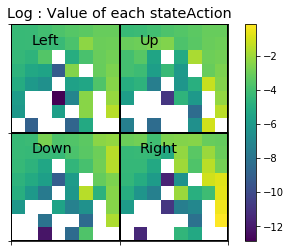

In [8]:
render(Q.Qtable, "Log : Value of each stateAction")

Policy map 
 # 0 - left 
 # 1 - down 
 # 2 -right 
 # 3 - up


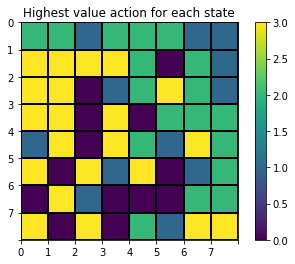

In [9]:
size=int(Q.stateNumber**(.5))
Q.epsilon = 0
array=np.reshape([Q.get_policy(i) for i in range(Q.stateNumber)],(size,size))  
plt.imshow(array)
# 0 - left
# 1 - down
# 2 -right
# 3 - up
plt.colorbar()

print("Policy map \n # 0 - left \n # 1 - down \n # 2 -right \n # 3 - up")
plt.title("Highest value action for each state")
plt.grid(b=True,color="black", which='both', axis='both',linewidth=2)
plt.xticks(np.arange(-.5,size,1),np.arange(0,size,1))
plt.yticks(np.arange(-.5,size,1),np.arange(0,size,1))
plt.show()

Iterations required : 1
Number of steps:  60


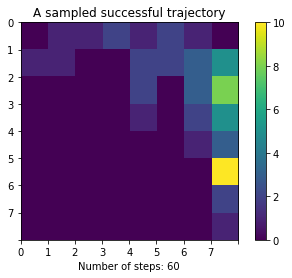

In [14]:
def trajectory(history):
    trajectoryMap=np.zeros(environment.env.nS)
    size=int( environment.env.nS ** (1/2) )
    
    for (state,action, reward) in history:
        trajectoryMap[state] += 1
    return trajectoryMap.reshape((size,size))

reward=0
count=0

while reward!=1:
    count+=1
    (reward, history)= episode(environment,Q)

print("Iterations required :", count)
print("Number of steps: ", len(history))
plt.imshow(trajectory(history))
plt.colorbar()
plt.xticks(np.arange(-.5,size,1),np.arange(0,size,1))
plt.yticks(np.arange(-.5,size,1),np.arange(0,size,1))
plt.title("A sampled successful trajectory")
plt.xlabel("Number of steps: " + str(len(history)))
plt.show()